# 3D роборука

### Установка необходимых компонентов(для отрисовки на сервере)
На локальной машине скорее всего не требуется

In [ ]:
!sudo apt update && sudo apt-get install xvfb xserver-xephyr vnc4server -y

In [ ]:
#installation
!pip install pyvirtualdisplay
!pip install pyglet==1.2.4
!sudo apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb xorg-dev python-opengl libboost-all-dev libsdl2-dev swig -y

In [ ]:
!pip install pyopengl

In [ ]:
!sudo apt install freeglut-devel

In [ ]:
!sudo apt install freeglut3-dev -y

После установки лучше перезапустить ядро

In [1]:
import gym
from gym import spaces
from gym.utils import seeding, EzPickle
import math
import numpy as np

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
SERVER = True
TEST = False

In [4]:
if SERVER:
    from pyvirtualdisplay import Display
    display = Display(visible=0, size=(1024, 768))
    display.start()
    import os
    os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [5]:
from robohand_3d import *
from lqr_controller import *

In [9]:
if not TEST:
    from gym.envs.registration import registry, register, make, spec
    register(
        id='TRoboHand-v0',
        entry_point=TRoboHand3D,#gym.envs.box2d:
        max_episode_steps=1000,
        reward_threshold=0,
    )

In [22]:
STEPS = 100

In [34]:
import gym

if TEST or True:
    env = TRoboHand3D( STEPS, 50, 50, moving_goal=True )
else:
    env = gym.make('TRoboHand-v0')
    

In [35]:
#Получаем динамику среды
F, f, C, c = env.reset()

In [36]:
#Создаем экземпляр LQR-контроллера
lqr = LQRController(STEPS, env.x_size, env.u_size)
steps = lqr.find_trajectory1( F, f, C, c, env.x )
print(steps[:3])

[[19.50094009 26.50932651 16.69866122 26.98872366]
 [ 4.7476937   6.63922684  4.24823304  6.70522995]
 [-0.57105867 -0.54424474 -0.26007356 -0.62179585]]


In [37]:
#Запуск
frames = []
for i in range(STEPS-1):
    env.step( steps[i] )
    if SERVER:
        frames += [env.render(mode='rgb_array')]
    else:
        env.render(mode='human')
env.close()

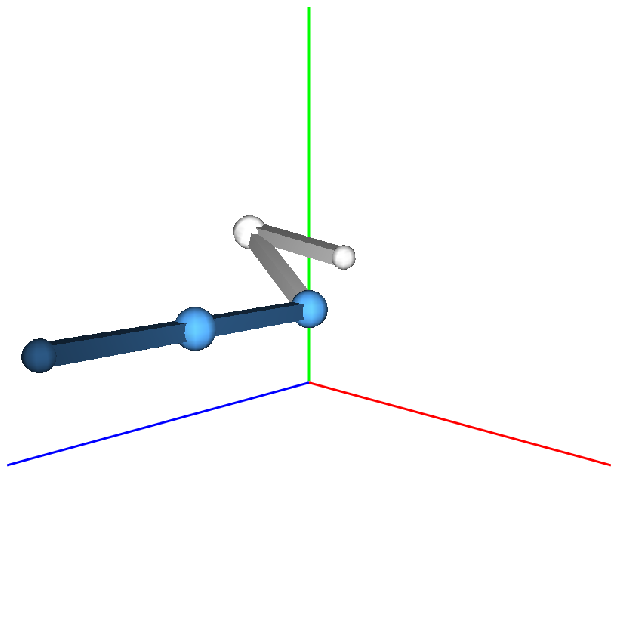

In [38]:
%matplotlib inline 

#Отрисовка для запуска на сервере

import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np
from IPython.display import HTML

plt.figure(figsize=(frames[0].shape[1] / 72.0 * 2.0, frames[0].shape[0] / 144.0 * 2.0 ), dpi = 72)
patch = plt.imshow(frames[0])
plt.axis('off')
animate = lambda i: patch.set_data(frames[i])
ani = matplotlib.animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval = 50)
HTML(ani.to_jshtml())
